**Rainfall**: It is the quantity of rainfall falling (in mm)

**Temperature**: Temperature (in celcius)

**Volume**: Volume of water taken from drinking water treatment plant (in cu. m)

**Hydrometry**: It is groundwater level (in m)

**Depth to groundwater**: It the groundwater level (in m from ground floor)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno    # It is the library for plotting the missing number values in each column

import warnings
warnings.filterwarnings('ignore')  # This removes all the warnings from the output

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv
/kaggle/input/acea-water-prediction/Aquifer_Auser.csv
/kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv
/kaggle/input/acea-water-prediction/datasets_description.ods
/kaggle/input/acea-water-prediction/Lake_Bilancino.csv
/kaggle/input/acea-water-prediction/datasets_description.xlsx
/kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv
/kaggle/input/acea-water-prediction/Aquifer_Luco.csv
/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv
/kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv
/kaggle/input/acea-water-prediction/River_Arno.csv


# **Data Preparation**

In [2]:
data = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv")
print(data.shape)
data.head()

(5223, 8)


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
data.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [4]:
from datetime import datetime, date

In [5]:
# Here we are dropping the previous the keeping nearly 10 years of data
data = data[data.Rainfall_Bastia_Umbra.notna()].reset_index(drop = True)
# notna() returns True is value is not null
# when a new dataframe is created after filtering the null values 
# it contains the column index with previous indexes
# reset_index(drop = True) helps in dropping that extra index column from dataframe
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)
data.columns = ['Date', 'Rainfall', 'Depth_to_groundwater', 'Temperature', 'Volume', 'Hydrometry']
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')

print(data.shape)
data.head()

(4199, 6)


,Date,Rainfall,Depth_to_groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [6]:
features = data.drop(['Depth_to_groundwater'], axis = 1)
target = [data['Depth_to_groundwater']]

# **Data Visualization**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Date')

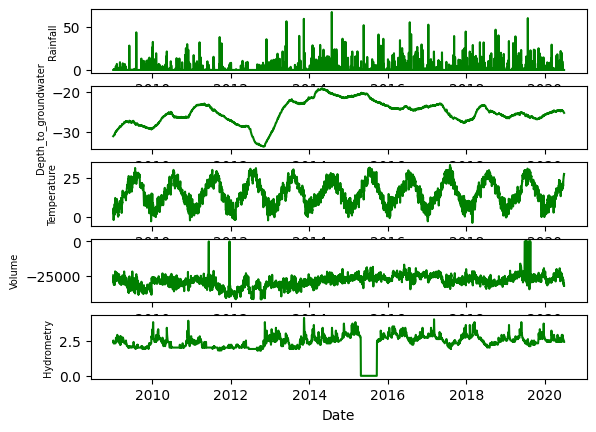

In [8]:
fig, ax = plt.subplots(nrows = 5, ncols = 1)

for i, col in enumerate(data.drop(['Date'], axis = 1).columns):
    sns.lineplot(x = data['Date'], y = data[col].fillna(method = 'ffill'), ax = ax[i], color = 'green')
    # fillna() function fills the NaN values using ffill method
    # ffill method replace NaN with last valid observation

    ax[i].set_ylabel(col, fontsize = 7)
    
ax[4].set_xlabel('Date')

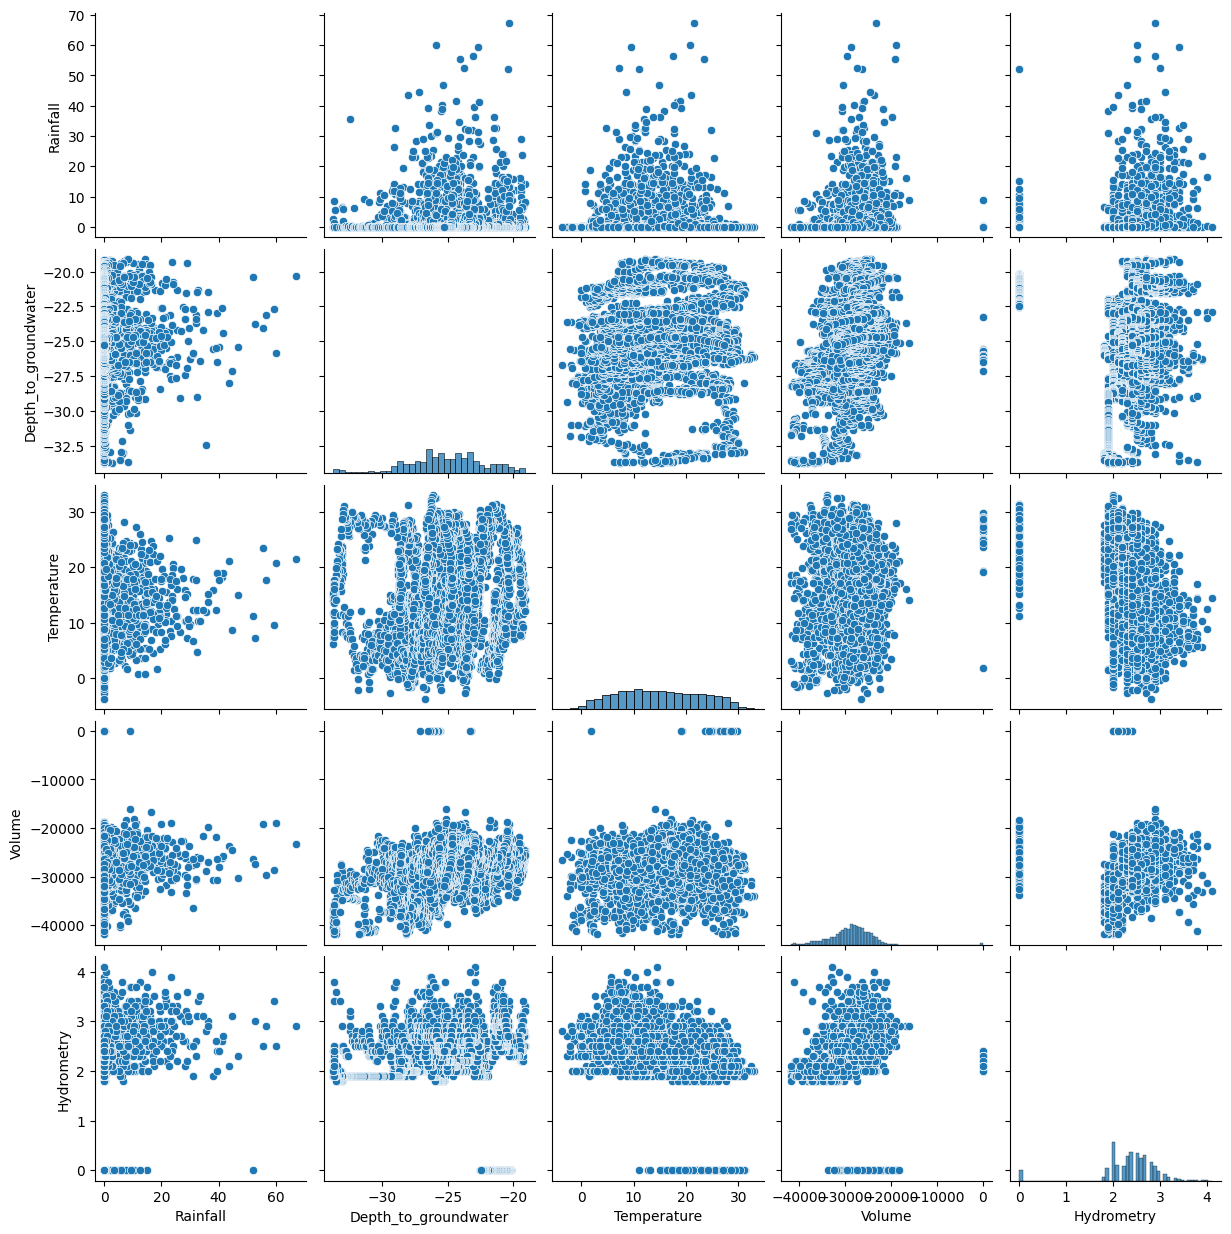

In [9]:
sns.pairplot(data)

# **Data Preprocessing**

**Timestamp of Time series should be in order**

It can be in **chronological order** where dates are sorted in sequential manner and **equidistant timestamps** where dates occur at regular intervals. Further, if dates are in neither of above formats then some re-sampling is required.

In [10]:
data = data.sort_values(by='Date')

data['Interval'] = data['Date'] - data['Date'].shift(1)
# shift() function shifts the index by one

print('Sum of all interval between dates: ', data['Interval'].sum())
print('Count number of rows: ', data['Interval'].count())

data = data.drop(['Interval'], axis=1)

print('Conclusion: It is clear that sum of intervals is equal to the number of rows which means dates are in chronological order.')

Sum of all interval between dates:  4198 days 00:00:00
Count number of rows:  4198
Conclusion: It is clear that sum of intervals is equal to the number of rows which means dates are in chronological order.


**Handling missing data**

In [11]:
data.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64

There are some zero values in Volume and Hydrometery column which is not correct data.

<Axes: >

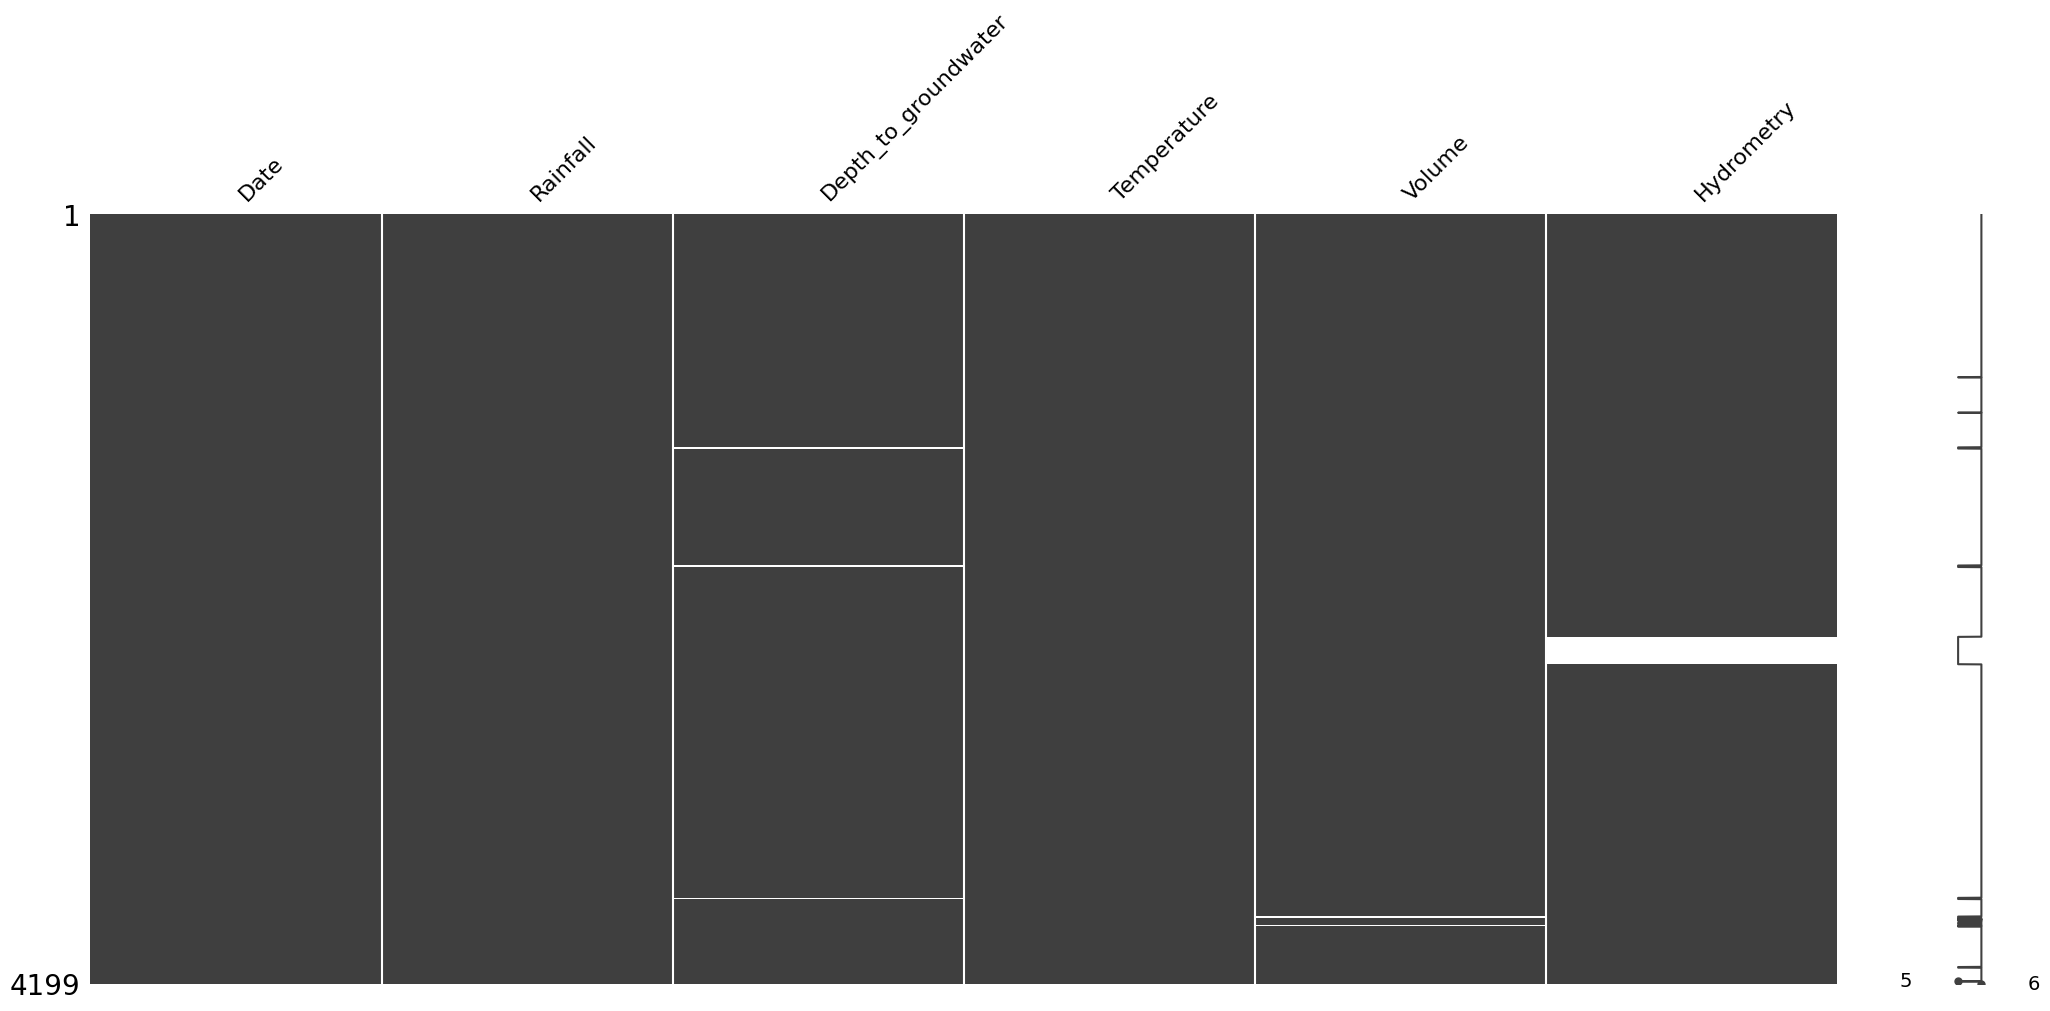

In [12]:
data['Volume'] = data['Volume'].replace(0, np.nan)
data['Hydrometry'] = data['Hydrometry'].replace(0, np.nan)

msno.matrix(data)

There are several methods for handling missing data:

1. **Fill NaN with fixed value**: Replacing Nan values with a fixed value ex. zero or np.inf

2. **Fill NaN with mean or median**: Replacing Nan value with mean or median of the column

3. **Fill NaN using ffill method**: Ffill method replaces the Nan value with last value

4. **Fill NaN with interploated value**: Interpolation can be linear, polynomial, nearest, etc. In linear interplotation values are equally spaced. Nan is filled considering the previous and next index value of the Nan.

We are using interploation here as it is the best option.

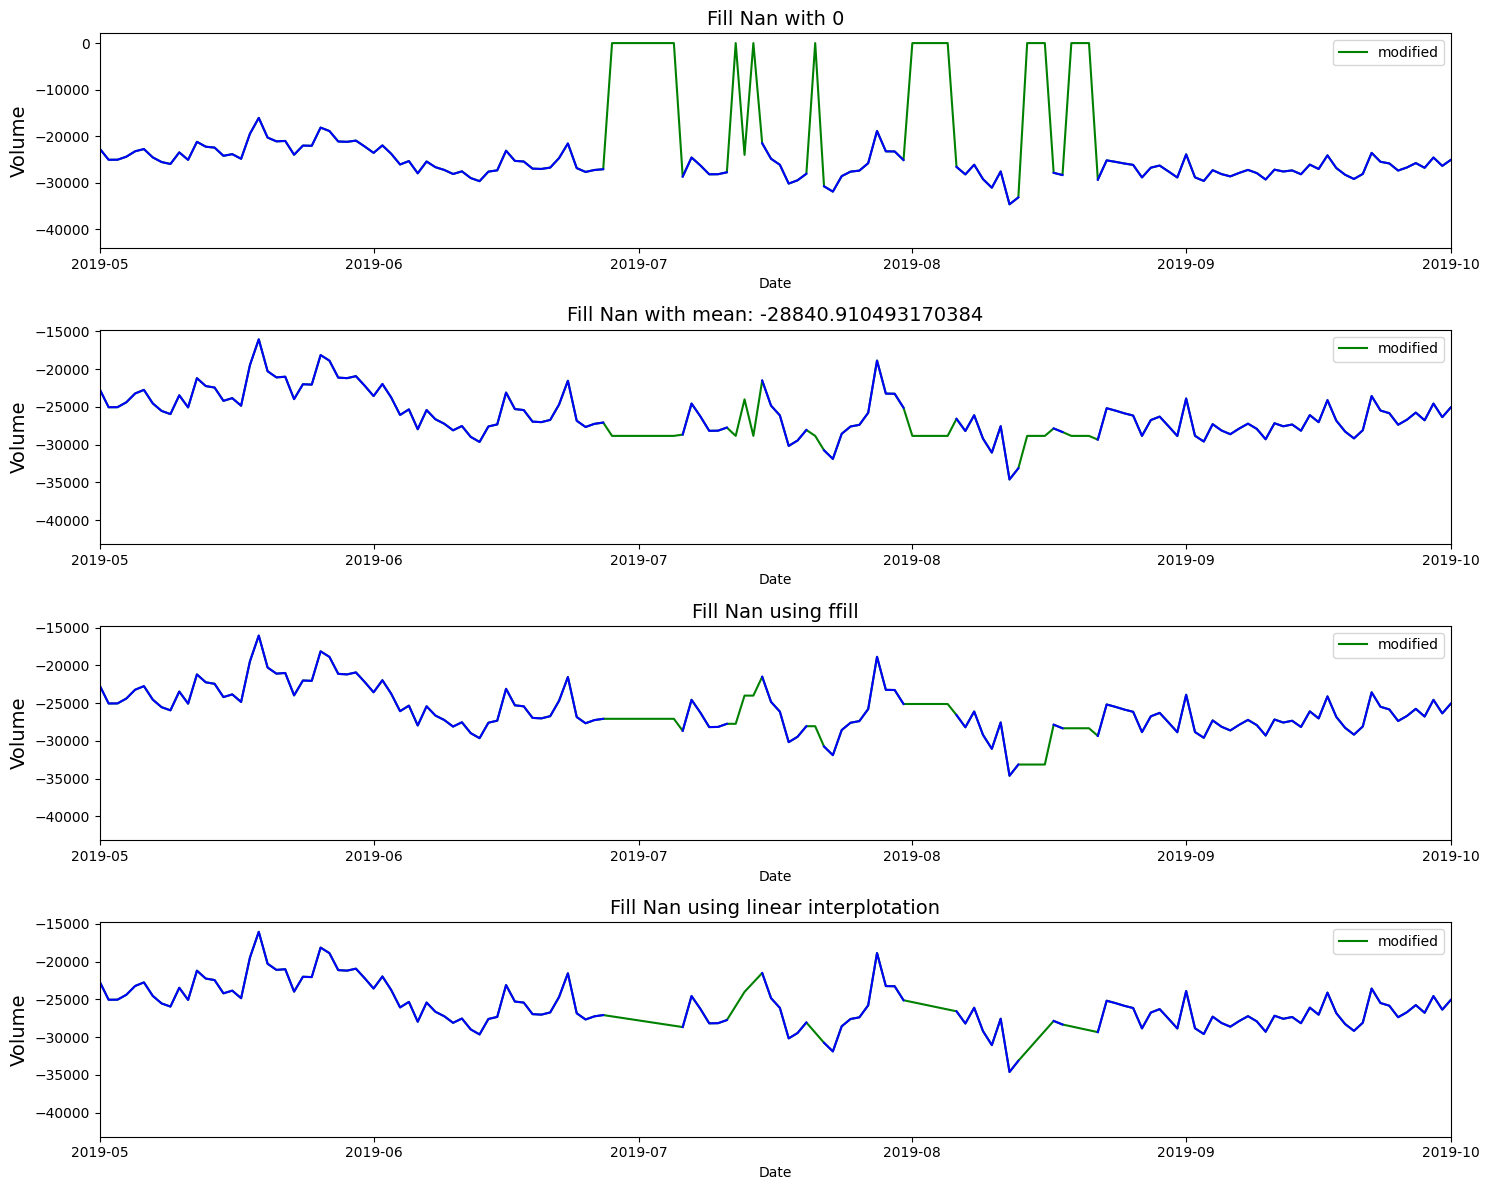

In [13]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 12))

sns.lineplot(x = data['Date'], y = data['Volume'].fillna(0), ax = ax[0], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[0], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
# hue argument can be used to put the separate sections in separate buckets. 
# Though it is faster and easy to read but an outlier in the data which is 
# surrounded by None will not be drawn on the chart.
# palette color is set to blue for every section/bucket.

ax[0].set_title('Fill Nan with 0', fontsize = 14)
ax[0].set_ylabel(ylabel = 'Volume', fontsize = 14)

mean_val = data['Volume'].mean()
sns.lineplot(x = data['Date'], y = data['Volume'].fillna(mean_val), ax = ax[1], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[1], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
ax[1].set_title(f'Fill Nan with mean: {mean_val}', fontsize = 14)
ax[1].set_ylabel(ylabel = 'Volume', fontsize = 14)

sns.lineplot(x = data['Date'], y = data['Volume'].ffill(), ax = ax[2], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[2], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
ax[2].set_title('Fill Nan using ffill', fontsize = 14)
ax[2].set_ylabel(ylabel = 'Volume', fontsize = 14)

sns.lineplot(x = data['Date'], y = data['Volume'].interpolate(), ax = ax[3], color = 'green', label = 'modified')
sns.lineplot(x = data['Date'], y = data['Volume'], hue=data["Volume"].isna().cumsum(), ax = ax[3], 
             palette=["blue"]*sum(data["Volume"].isna()), label = 'original', legend = False)
ax[3].set_title('Fill Nan using linear interplotation', fontsize = 14)
ax[3].set_ylabel(ylabel = 'Volume', fontsize = 14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()  
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.show()

In [14]:
data['Volume'] = data['Volume'].interpolate()
data['Hydrometry'] = data['Hydrometry'].interpolate()
data['Depth_to_groundwater'] = data['Depth_to_groundwater'].interpolate()

**Smoothing data or Resampling**

Smoothing or resampling in time series data involves adjusting the data frequency. It can be done by

* **Upsampling**: when the frequency of samples is increased (e.g. days to hours)
* **Downsampling**: when the frequency of samples is decreased (e.g. days to weeks)
* **Resampling for Irregular data**: converts irregular data to regular intervals
* **Rolling statistics**: Instead of computing a single statistic over an entire set of data, we compute a rolling statistic against a subset or window of that data, and we adjust the window with each new data point we encounter (e.g. a window to 10 days, calculate mean, keep sliding window and form a curve)
* **Moving averagees**: smooth data by averaging values in a sliding window
* **Exponential smoothning**: assigns exponentially decreasing weights to older data
* **Decomposition and Trend analysis**: split data into trend, seasonality, and residuals for better modeling

Here in our data we will be using downsampling to smoothen our data.

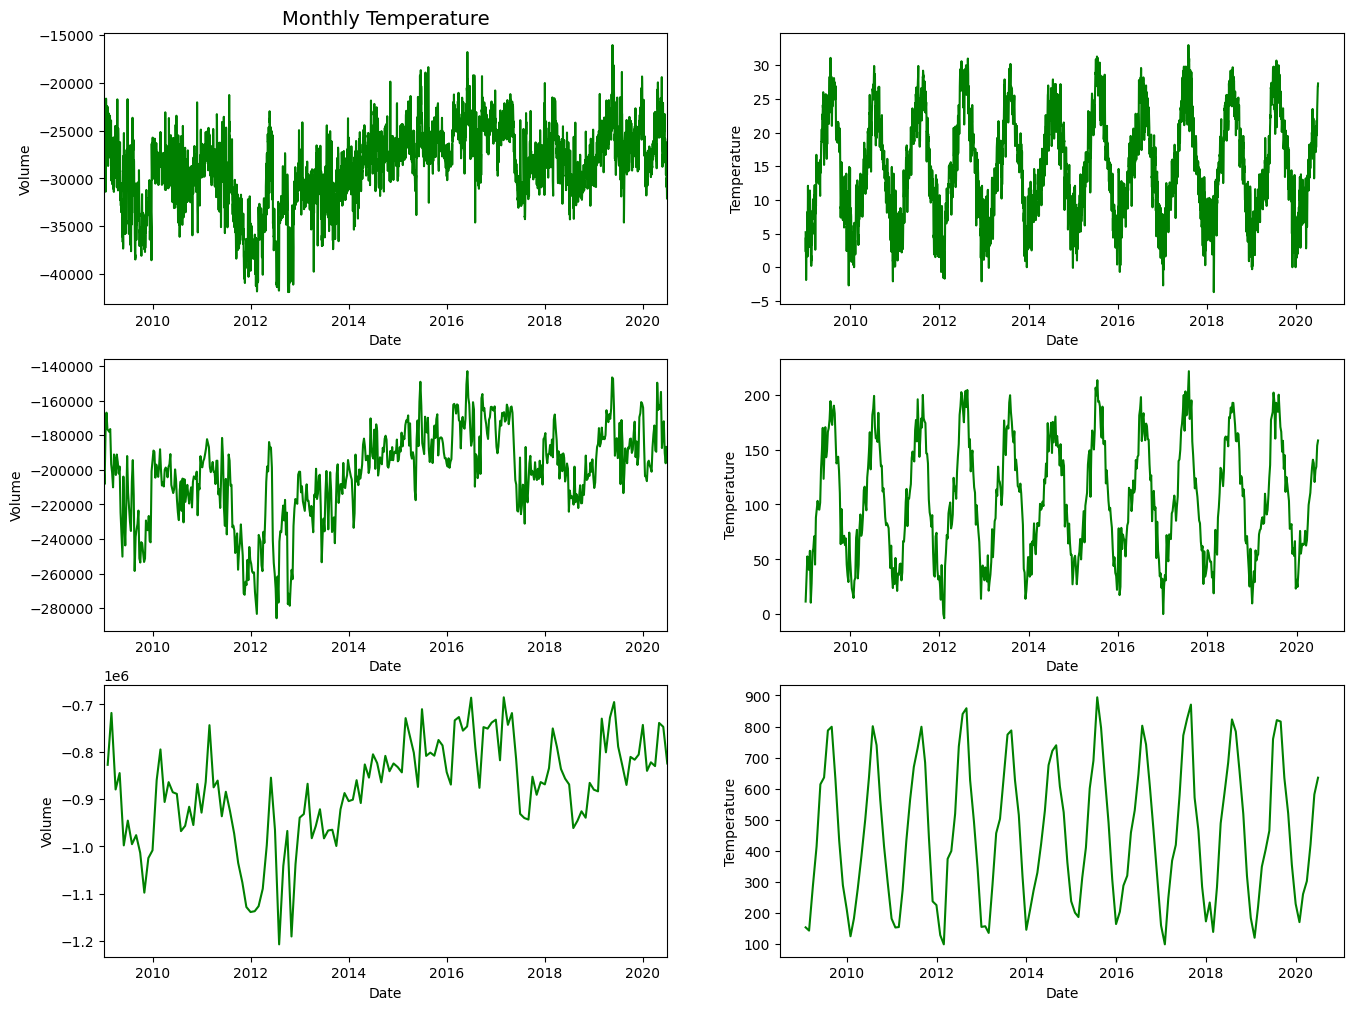

In [15]:
fig, ax= plt.subplots(nrows = 3, ncols = 2, figsize = (16, 12))

# Downsampling Volume
sns.lineplot(x = data['Date'], y = data['Volume'], color = 'green', ax = ax[0, 0])
ax[0, 0].set_title('Volume', fontsize = 14)

resampled_week = data[['Date', 'Volume']].resample('7D', on='Date').sum().reset_index()
sns.lineplot(x = resampled_week['Date'], y = resampled_week['Volume'], color = 'green', ax = ax[1, 0])
ax[0, 0].set_title('Weekly Volume', fontsize = 14)

resampled_month = data[['Date', 'Volume']].resample('M', on='Date').sum().reset_index()
sns.lineplot(x = resampled_month['Date'], y = resampled_month['Volume'], color = 'green', ax = ax[2, 0])
ax[0, 0].set_title('Monthly Volume', fontsize = 14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
# Downsampling Temperature
sns.lineplot(x = data['Date'], y = data['Temperature'], color = 'green', ax = ax[0, 1])
ax[0, 0].set_title('Temperature', fontsize = 14)

resampled_week = data[['Date', 'Temperature']].resample('7D', on='Date').sum().reset_index()
sns.lineplot(x = resampled_week['Date'], y = resampled_week['Temperature'], color = 'green', ax = ax[1, 1])
ax[0, 0].set_title('Weekly Temperature', fontsize = 14)

resampled_month = data[['Date', 'Temperature']].resample('M', on='Date').sum().reset_index()
sns.lineplot(x = resampled_month['Date'], y = resampled_month['Temperature'], color = 'green', ax = ax[2, 1])
ax[0, 0].set_title('Monthly Temperature', fontsize = 14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

In [16]:
# Weekly downsampling can smooth data and help in analysis
data = data[['Date', 'Rainfall', 'Depth_to_groundwater', 
             'Temperature', 'Volume', 'Hydrometry']].resample('7D', on='Date').sum().reset_index()

**Stationarity**

Some time-series models like ARIMA, assume that data is stationary. Stationarity describes that data has:
* constant mean and mean is not time-dependent
* constant variance and variance is not time-dependent
* constant covariance and covariance is not time-dependent

Three ways to check stationary:
1. **Visual**: plot time series and check trends for stationarity
2. **Basic Statistics**: split time series and compare the mean and variance of each partition
3. **Statistical test**: Augmented Dickey Fuller test

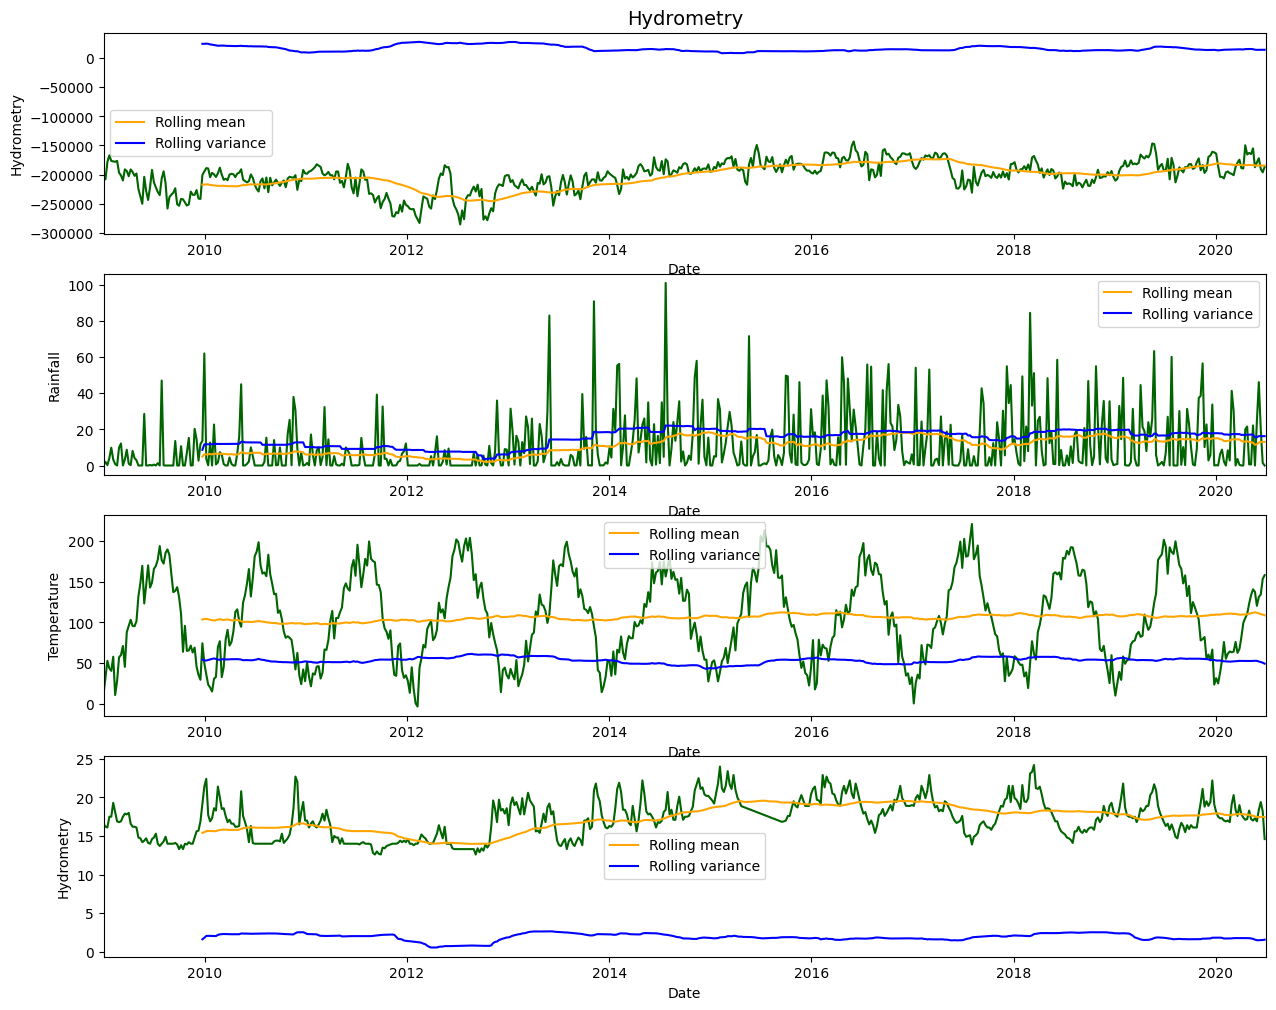

In [17]:
# Checking stationarity using Visual method
rolling_window = 52                 # our data is sampled weekly and a year has 52 week
fig, ax = plt.subplots(nrows = 4, ncols=1, figsize = (15, 12))

sns.lineplot(x = data['Date'], y = data['Volume'], ax = ax[0], color = 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Volume'].rolling(rolling_window).mean(), ax = ax[0], 
             color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y = data['Volume'].rolling(rolling_window).std(), ax = ax[0], 
             color = 'blue', label = 'Rolling variance')
ax[0].set_title('Volume', fontsize = 14)
ax[0].set_ylabel('Volume')

sns.lineplot(x = data['Date'], y = data['Rainfall'], ax = ax[1], color = 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Rainfall'].rolling(rolling_window).mean(), ax = ax[1], 
             color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y = data['Rainfall'].rolling(rolling_window).std(), ax = ax[1], 
             color = 'blue', label = 'Rolling variance')
ax[0].set_title('Rainfall', fontsize = 14)
ax[0].set_ylabel('Rainfall')

sns.lineplot(x = data['Date'], y = data['Temperature'], ax = ax[2], color = 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Temperature'].rolling(rolling_window).mean(), ax = ax[2], 
             color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y = data['Temperature'].rolling(rolling_window).std(), ax = ax[2], 
             color = 'blue', label = 'Rolling variance')
ax[0].set_title('Temperature', fontsize = 14)
ax[0].set_ylabel('Temperature')

sns.lineplot(x = data['Date'], y = data['Hydrometry'], ax = ax[3], color = 'darkgreen')
sns.lineplot(x = data['Date'], y = data['Hydrometry'].rolling(rolling_window).mean(), ax = ax[3], 
             color = 'orange', label = 'Rolling mean')
sns.lineplot(x = data['Date'], y = data['Hydrometry'].rolling(rolling_window).std(), ax = ax[3], 
             color = 'blue', label = 'Rolling variance')
ax[0].set_title('Hydrometry', fontsize = 14)
ax[0].set_ylabel('Hydrometry')

for i in range(4):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

As it can be seen, though mean is not stationary but it seems to be close to stationarity. Hence, we will check stationarity using statistical test ADF.

**Augmented Dickey Fuller(ADF)**: It is a type to statistical test called unit root test. Unit roots are cause of non-stationarity.

**Unit Root Test**: A unit root test attempts to determine whether a given time series is consistent with a unit root process. Technically , a unit root is said to exist in a time series of value of alpha =1 in below equation. yt = yt–1 + stationary process.

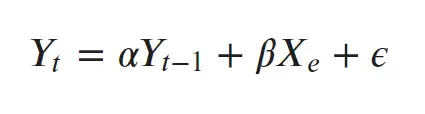

where Yt is value of the time series at time ‘t’ and Xe is an exogenous variable (i.e. one whose measure is determined outside the model and is imposed on the model).

**The presence of a unit root means the time series is non-stationary.**


* **Null Hypothesis**: Time series has a unit root.(Time series is not stationary)
* **Alternate Hypothesis**: Time series has no unit root.(Time series is stationary)

**If null hypothesis is rejected then time series is stationary**

Let default significance level and critical value be 5%. Ways of rejecting null hypothesis:

* **p-value > significance level (default: 0.05)**: Fail to reject null hypothesis
* **p-value <= significance level (default: 0.05)**: Reject null hypothesis

* **ADF statistic > critical value**: Fail to reject null hypothesis
* **ADF statistic <= critical value**: Reject null hypothesis

In [18]:
from statsmodels.tsa.stattools import adfuller

# Input to adfuller function is a series
adfuller(data['Rainfall'].values)

(-3.373912499253639,
 0.011880998999360482,
 15,
 584,
 {'1%': -3.4415970480373046,
  '5%': -2.866501759246704,
  '10%': -2.5694124827594296},
 4872.646742748393)

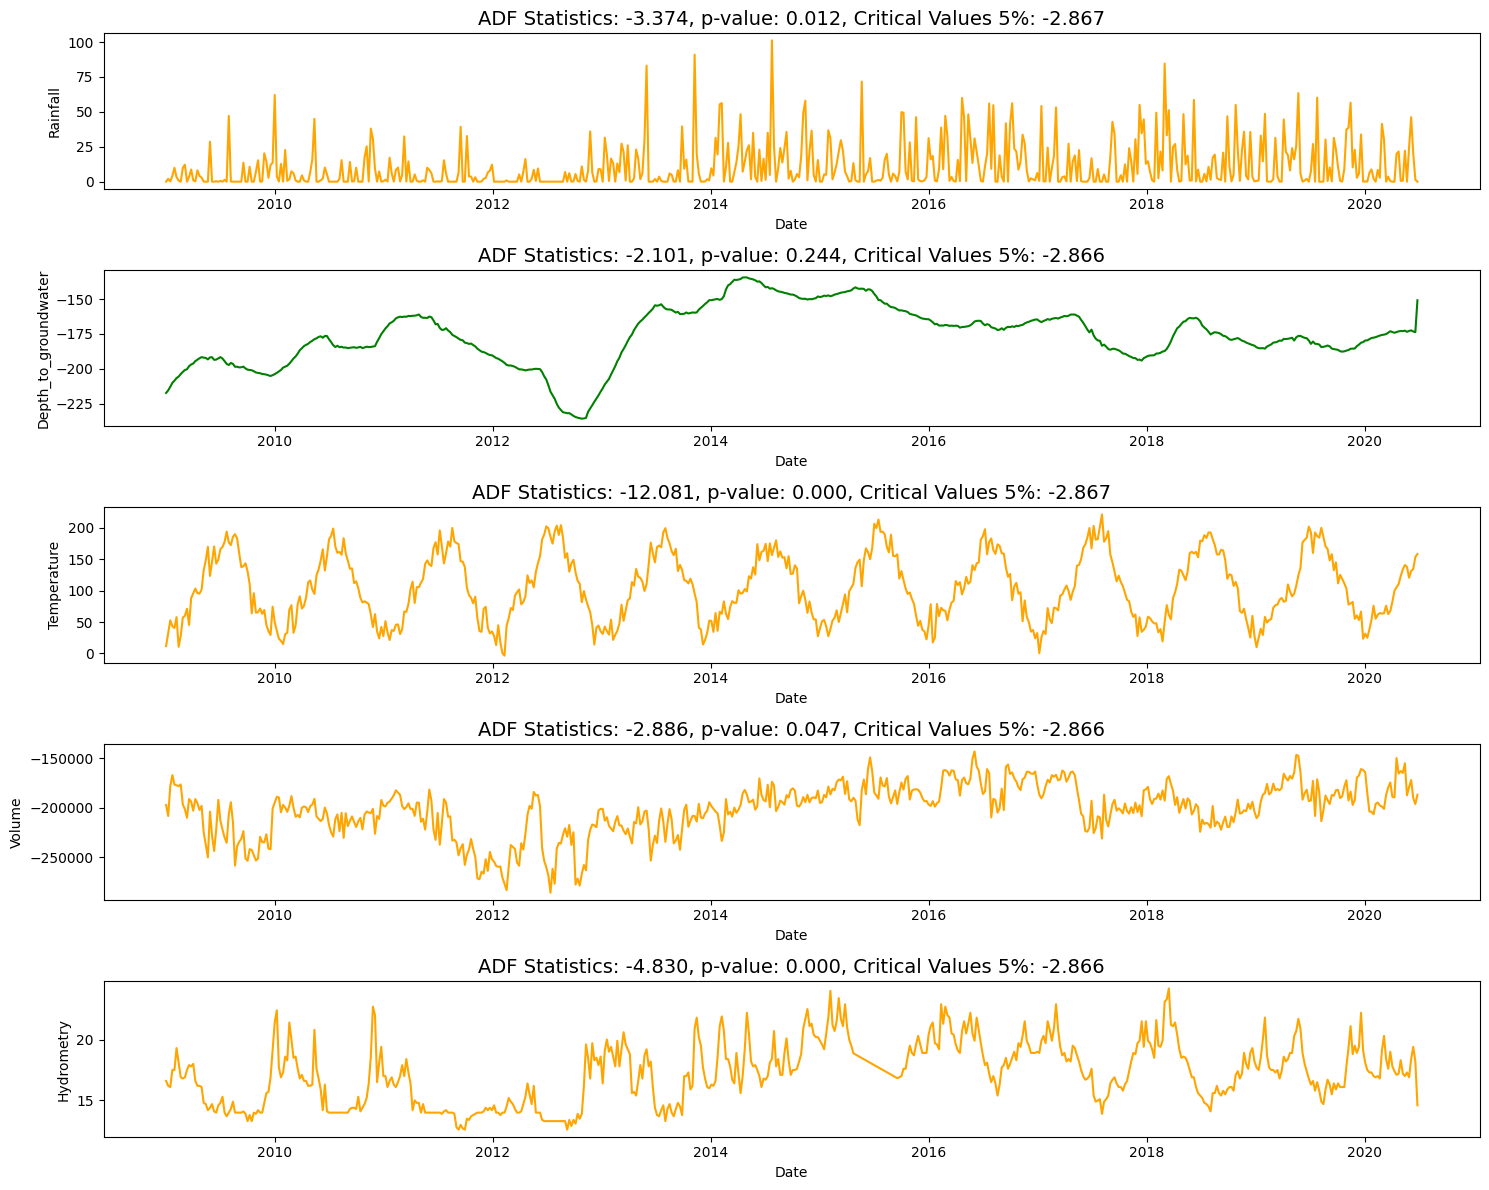

In [19]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (15, 12))

def visualize_adf_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_value = result[1]
    critical_val_5 = result[4]['5%']
    
    if (p_value < significance_level) and (adf_stat < critical_val_5):
        linecolor = 'orange'
    else:
        linecolor = 'green'
        
    sns.lineplot(x = data['Date'], y = series, ax = ax, color = linecolor)
    ax.set_title(f'ADF Statistics: {adf_stat:0.3f}, p-value: {p_value:0.3f}, Critical Values 5%: {critical_val_5:0.3f}', fontsize = 14)
    ax.set_ylabel(title)
    
for i, title in enumerate(data.drop(['Date'],axis=1).columns):
    visualize_adf_results(data[title], title, ax[i])
    
plt.tight_layout()
plt.show()

As it can be seen above, plots in orange color are stationary while the depth_to_groundwater is not stationary. Hence, we have some common methods for converting it to stationary.

1. **Transformation**: e.g. log or square root to stabilize non-constant variance
2. **Differencing**: subtracts the current value from the previous. It can be first order, second order and so on.

In [20]:
# Applying log transform
# For negative values it will be Nan
# log_series = np.log(abs(data['Depth_to_groundwater']))

# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
# visualize_adf_results(log_series, 'Transformed Depth_to_groundwater', ax[0])
# sns.distplot(log_series, ax = ax[1])

# Conclusion: This transformation cannot make data stationary

<Axes: xlabel='Depth_to_groundwater', ylabel='Density'>

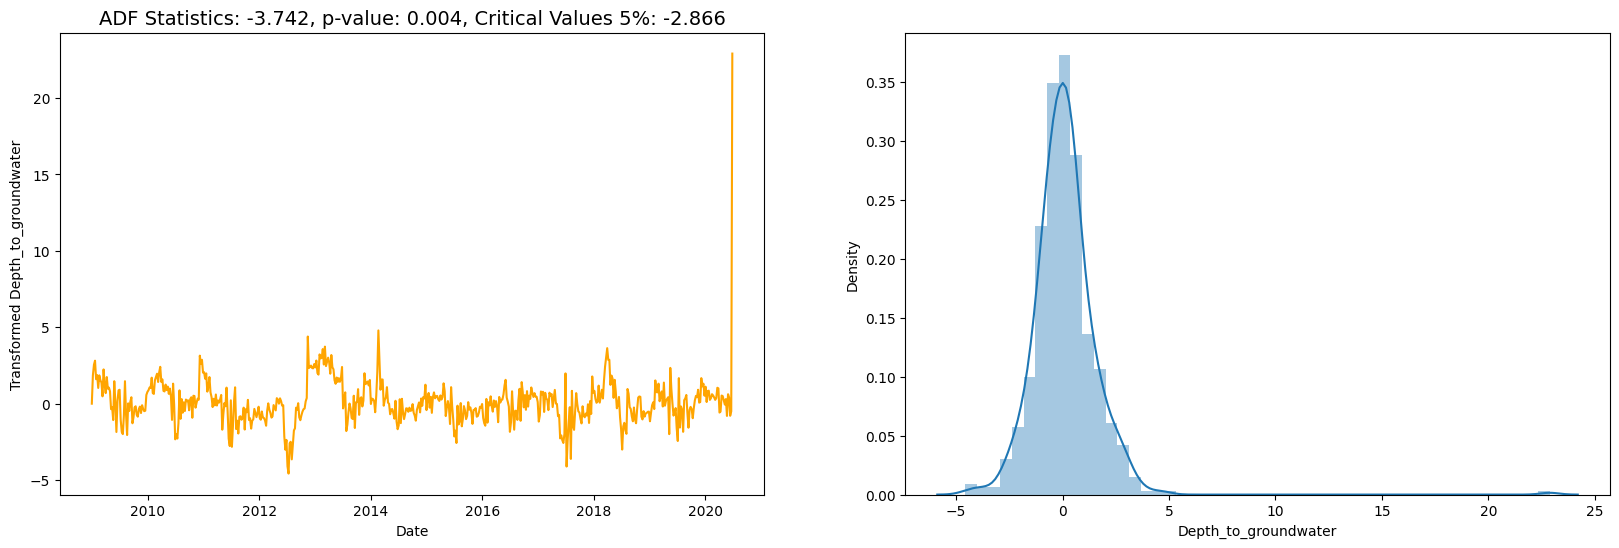

In [21]:
# If you want to apply differencing
# Applying first order differencing
data['Depth_to_groundwater'] = np.append([0], np.diff(data['Depth_to_groundwater']))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
visualize_adf_results(data['Depth_to_groundwater'], 'Transformed Depth_to_groundwater', ax[0])
sns.distplot(data['Depth_to_groundwater'], ax = ax[1])

# **Exploratory Data Analysis**

**Time Series Decomposition**

Timeseries decomposition involves thinking of a series as a combination of level, trend, seasonality and noise components. 
* **Level**: average value in the series
* **Trend**: increasing or decreasing value of series
* **Seasonality**: repeating short term cycle in series
* **Noise**: random variation in series

All series have level and noise. The trend and seasonality components are optional.

Components can combine either additively or multiplicatively:
* **Additive**: y(t) = Level + Trend + Seasonality + Noise
* **Multiplicative**: y(t) = Level * Trend * Seasonality * Noise

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns = data.drop(['Date'], axis = 1).columns

for col in core_columns:
    decompose = seasonal_decompose(data[col], period = 52, model = 'additive', extrapolate_trend = 'freq')
    # It is a method to decompose a time series into a trend component, multiple seasonal components, and a residual component.
    # The seasonal decomposition is a method used in time series analysis to represent a time series as a sum 
    # (or, sometimes, a product) of three components – the linear trend, the periodic (seasonal) component, and random residuals. 
    data[f'{col}_trend'] = decompose.trend
    data[f'{col}_seasonal'] = decompose.seasonal

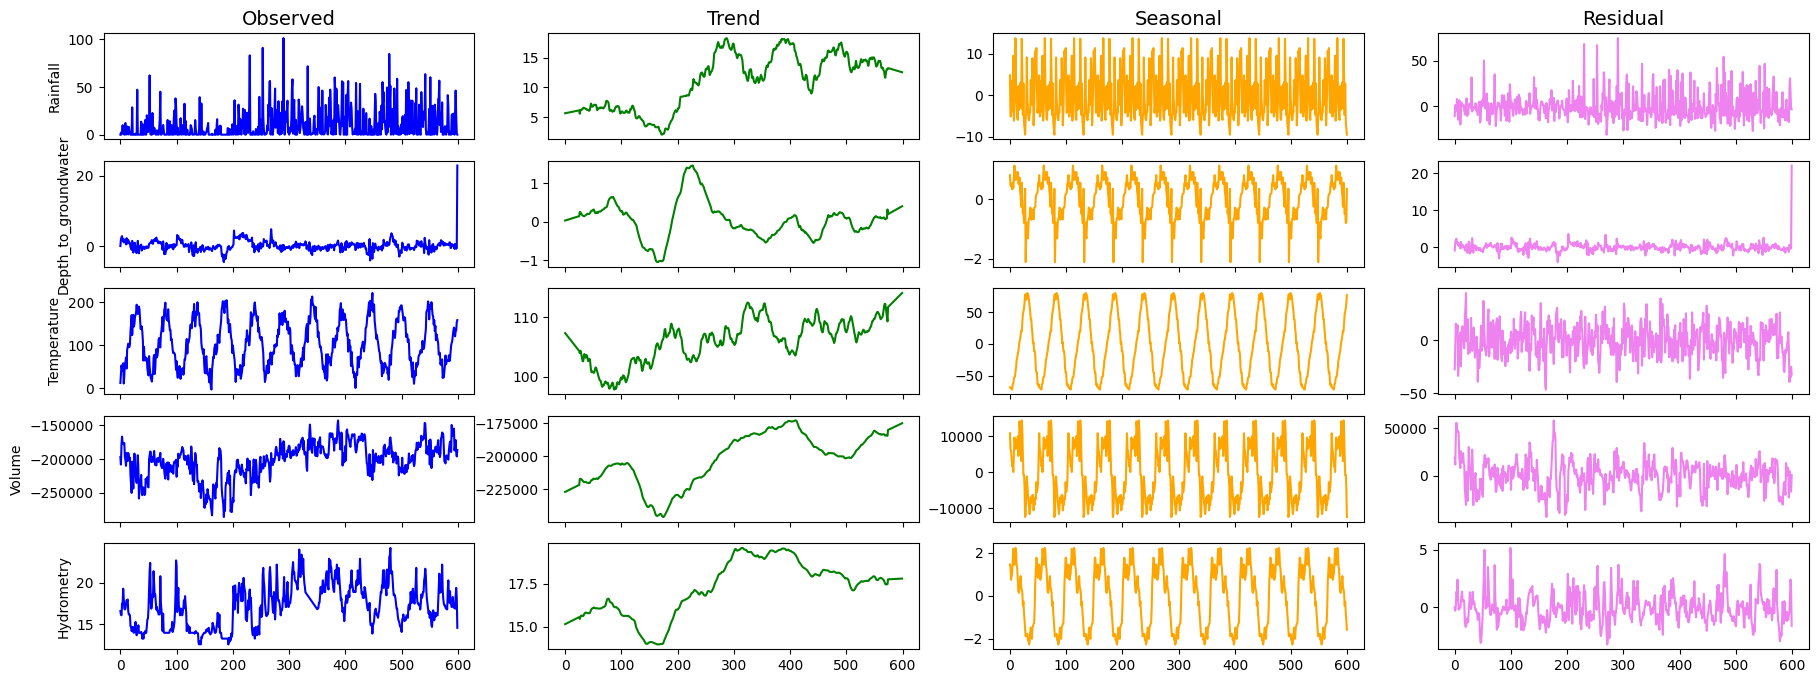

In [23]:
fig, ax = plt.subplots(nrows = 5, ncols = 4, sharex = True, figsize  = (22, 8))

def plot_seasonal_decompose(column, i):
    result = seasonal_decompose(data[column], period = 52, model = 'additive', extrapolate_trend = 'freq')
    
    ax[0, 0].set_title('Observed', fontsize = 14)
    result.observed.plot(ax = ax[i, 0], legend = False, color = 'blue')
    ax[i, 0].set_ylabel(column, fontsize = 10)
    
    ax[0, 1].set_title('Trend', fontsize = 14)
    result.trend.plot(ax = ax[i, 1], legend = False, color = 'green')
    
    ax[0, 2].set_title('Seasonal', fontsize = 14)
    result.seasonal.plot(ax = ax[i, 2], legend = False, color = 'orange')
    
    ax[0, 3].set_title('Residual', fontsize = 14)
    result.resid.plot(ax = ax[i, 3], legend = False, color = 'violet')
    

for i, col in enumerate(core_columns):
    plot_seasonal_decompose(col, i)

(17439.0, 18443.0)

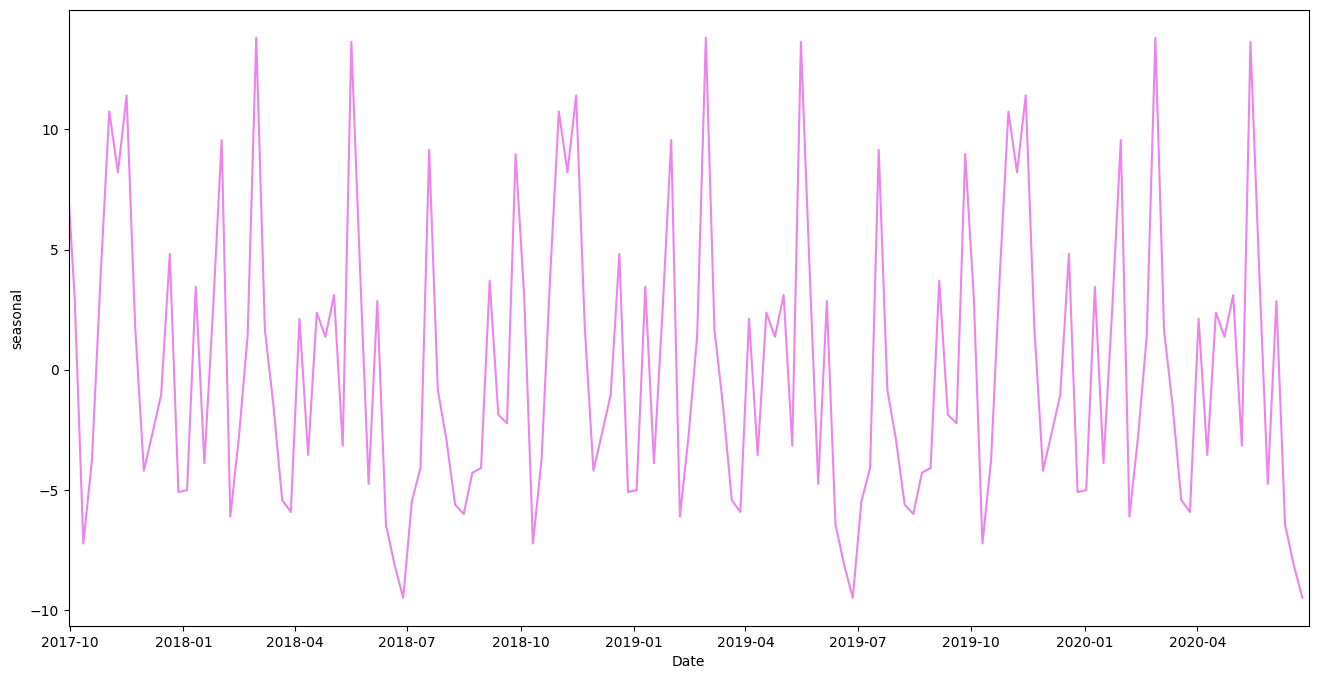

In [24]:
# Individual decomposition of features

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

result = seasonal_decompose(data['Rainfall'], period = 52, model = 'additive', extrapolate_trend = 'freq')

sns.lineplot(x=data['Date'], y=result.seasonal, color='violet')
ax.set_xlim([date(2017, 9, 30), date(2020, 6, 30)])

**Correlation matrix**

Text(0.5, 1.0, 'Correlation Matrix')

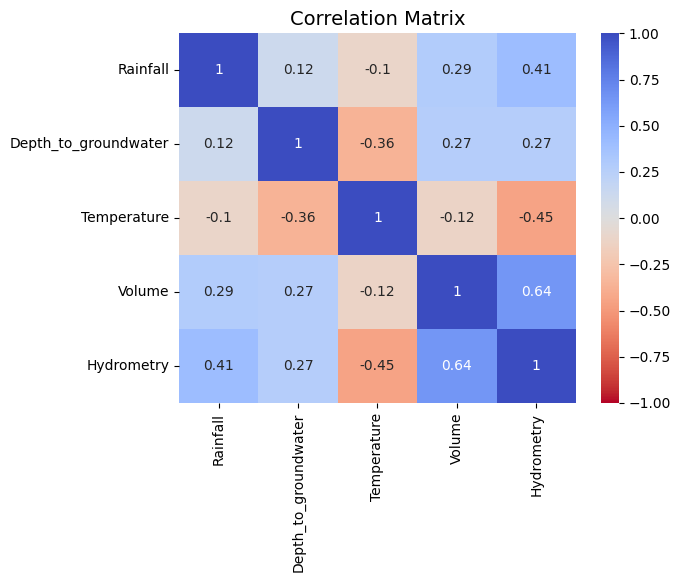

In [25]:
corr_matrix = data[core_columns].corr()

sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm_r')
plt.title('Correlation Matrix', fontsize = 14)

**Autocorrelation Analysis**

Autocorrelation is the correlation between two observations at different points in a time series. Autocorrelation(ACF) and Partial Autocorrelation(PACF) are statistical tools used in time series analysis to understand and analyze the patterns and dependencies within a time series dataset. They help in identifying the presence of serial correlation, which is the correlation between a time series and its lagged versions (previous time points). 

* **Autocorrelation Function (ACF)**:

**Definition**: ACF measures the correlation between a time series and its lagged values at different time intervals.

**Purpose**: It helps to identify the underlying patterns or trends in the time series. A strong autocorrelation at a particular lag indicates that the current value of the time series depends on its past values up to that lag.

**Interpretation**:
If ACF at lag 1 is high, it suggests a strong linear relationship between the current value and the previous value.

If ACF shows periodicity (e.g., every 12 lags), it might indicate a seasonal pattern in the data.

If ACF drops off quickly after a few lags, it suggests that most of the information in the series is contained within those lags.

* **Partial Autocorrelation Function (PACF)**:

**Definition**: PACF measures the correlation between a time series and its lagged values after removing the linear dependence of the series on the intervening lags.

**Purpose**: PACF helps in identifying the order of an autoregressive (AR) model. An AR model represents the current value as a linear combination of its past values. PACF helps to identify the number of past values that directly influence the current value, effectively showing the "pure" correlation.

**Interpretation**:
A significant PACF value at lag k indicates that there's a direct relationship between the current value and the value k time units ago.

Non-significant PACF values at lags beyond the identified order suggest that those lags do not contribute significantly to predicting the current value.

Study graphs of ACF and PACF: https://spureconomics.com/interpreting-acf-and-pacf-plots/

Different time series forecasting methods: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

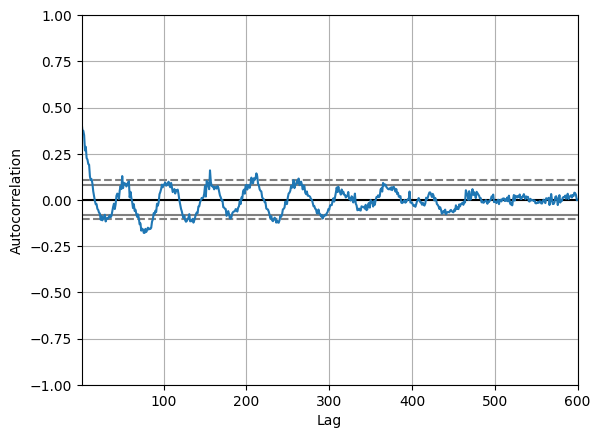

In [26]:
# Using pandas
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Depth_to_groundwater'])

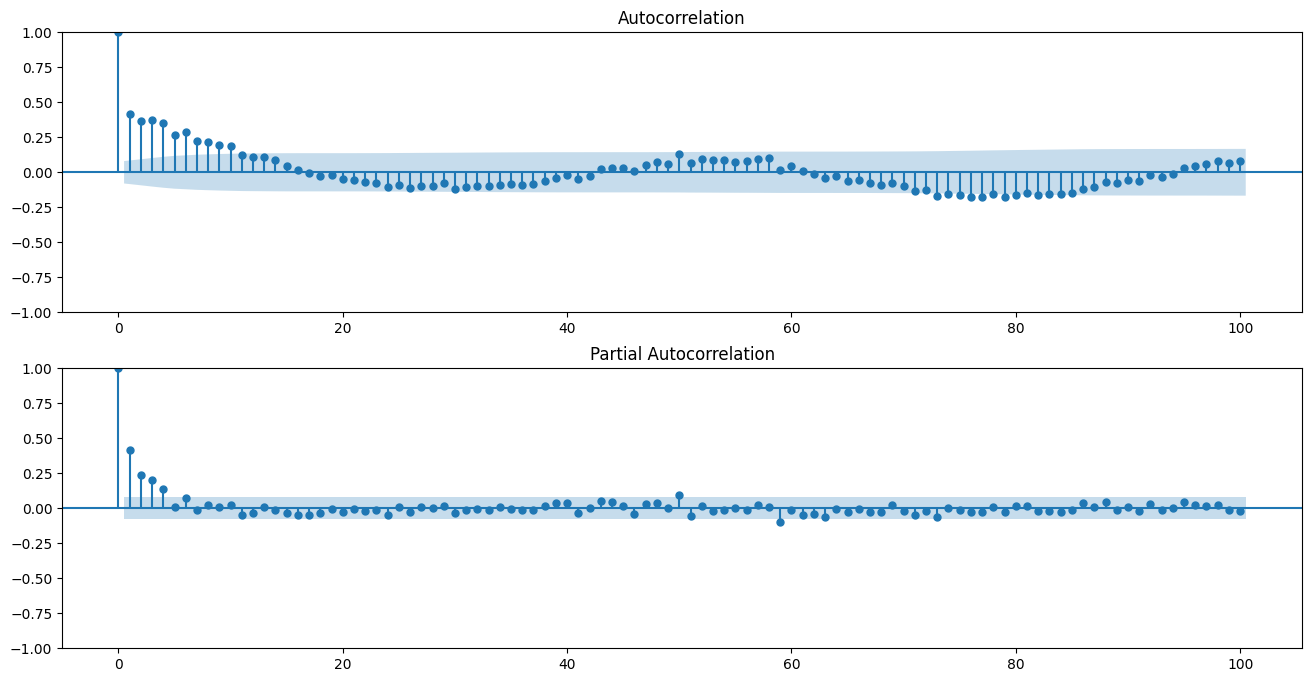

In [27]:
# Using statmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16,8))

plot_acf(data['Depth_to_groundwater'], lags = 100, ax = ax[0])
plot_pacf(data['Depth_to_groundwater'], lags = 100, ax = ax[1])

plt.show()

# **Models**

Time series that can be univariate or multivariate:

**Univariate** time series only has a single time-dependent variable.

**Multivariate** time series have multiple time-dependent variable.

Here, I am applying multivariate time series as we have more that one time-dependent features.

In [28]:
features = ['Rainfall', 'Temperature', 'Volume', 'Hydrometry']
target = ['Depth_to_groundwater']

train_size = int(0.85 * len(data)) 

multivariate_data = data[['Date'] + target + features].copy()
multivariate_data.columns = ['ds', 'y'] + features
# Columns named ds i.e. Date and y i.e. Target
# Forecasting models themselves identify ds, y as date and Target value respectively from data.

train = multivariate_data.iloc[:train_size, :]

# Splitting data into training and validation dataset
X_train = pd.DataFrame(multivariate_data.iloc[:train_size, [0, 2, 3, 4, 5]])
Y_train = pd.DataFrame(multivariate_data.iloc[:train_size, 1])

X_valid = pd.DataFrame(multivariate_data.iloc[train_size: , [0, 2, 3, 4, 5]])
Y_valid = pd.DataFrame(multivariate_data.iloc[train_size: , 1])

train.head()

,ds,y,Rainfall,Temperature,Volume,Hydrometry
0,2009-01-01,0.00,0.0,11.6,-197154.432,16.6
1,2009-01-08,1.85,2.0,32.0,-208290.528,16.2
2,2009-01-15,2.55,0.2,52.7,-178242.336,16.1
3,2009-01-22,2.81,4.1,43.5,-166980.960,17.5
4,2009-01-29,1.60,9.9,40.4,-176473.728,17.5


**Prophet**

In [29]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

# Training model
model = Prophet()
for col in features:
    model.add_regressor(col)
    
# Fit model
model.fit(train)

# Predict on validation set
y_pred = model.predict(X_valid)

# Calculate error
mae = mean_absolute_error(Y_valid, y_pred['yhat'])
rmse = np.sqrt(mean_squared_error(Y_valid, y_pred['yhat']))

print(Fore.GREEN + f'MAE: {mae}')
print(Fore.BLUE + f'RMSE: {rmse}')

18:53:43 - cmdstanpy - INFO - Chain [1] start processing
18:53:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.9159675497662607
RMSE: 2.685683507527288


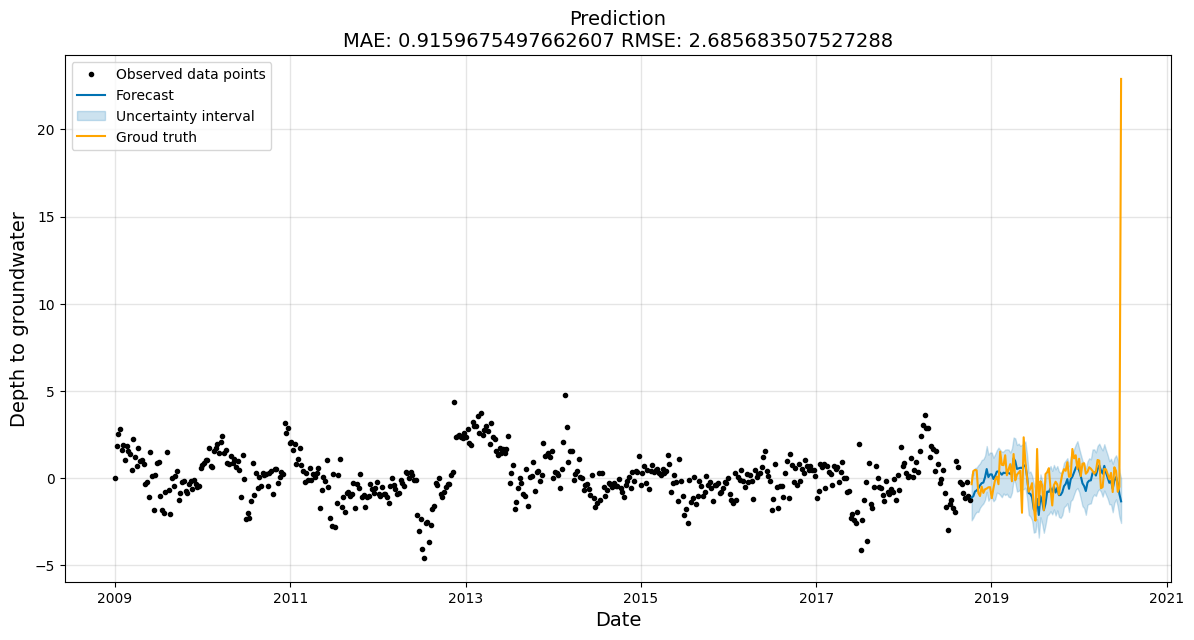

In [30]:
fig, ax = plt.subplots(1, figsize = (12, 6))

model.plot(y_pred, ax = ax)
sns.lineplot(x = X_valid['ds'], y = Y_valid['y'], ax = ax, color = 'orange', label = 'Groud truth')

ax.set_title(f'Prediction\nMAE: {mae} RMSE: {rmse}', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Depth to groundwater', fontsize = 14)

plt.show()